In [1]:
import tensorflow as tf
tf.keras.utils.get_file('cats_and_dogs_filtered.zip',"https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip")

'/home/aarav/.keras/datasets/cats_and_dogs_filtered.zip'

In [2]:
#import os
#import zipfile #to handle zip file

#local_zip = '/root/.keras/datasets/cats_and_dogs_filtered.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall()
#zip_ref.close()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models

In [4]:
#std_normalize = transforms.Normalize(mean=[0, 0, 0],std=[1, 1, 1])

In [5]:
trans_train = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor()
])
trans_test = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor()
])

In [6]:
train_dataset = torchvision.datasets.ImageFolder('cats_and_dogs_filtered/train',transform=trans_train)

In [7]:
train_dataset.classes

['cats', 'dogs']

In [8]:
test_dataset = torchvision.datasets.ImageFolder('cats_and_dogs_filtered/validation',transform=trans_test)

In [9]:
batch_size = 100

In [10]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [11]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size = batch_size,
                                         shuffle = False)

In [12]:
examples = iter(train_loader)
samples ,labels = examples.next()
print(samples.shape)
labels

torch.Size([100, 3, 224, 224])


tensor([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 0])

In [13]:
def imshow(img,title):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(25,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(title)
    plt.show()

In [14]:
sample_plot = samples[0:16]
label_plot = labels[0:16]

In [15]:
out = torchvision.utils.make_grid(sample_plot)

In [16]:
class_name = train_dataset.classes

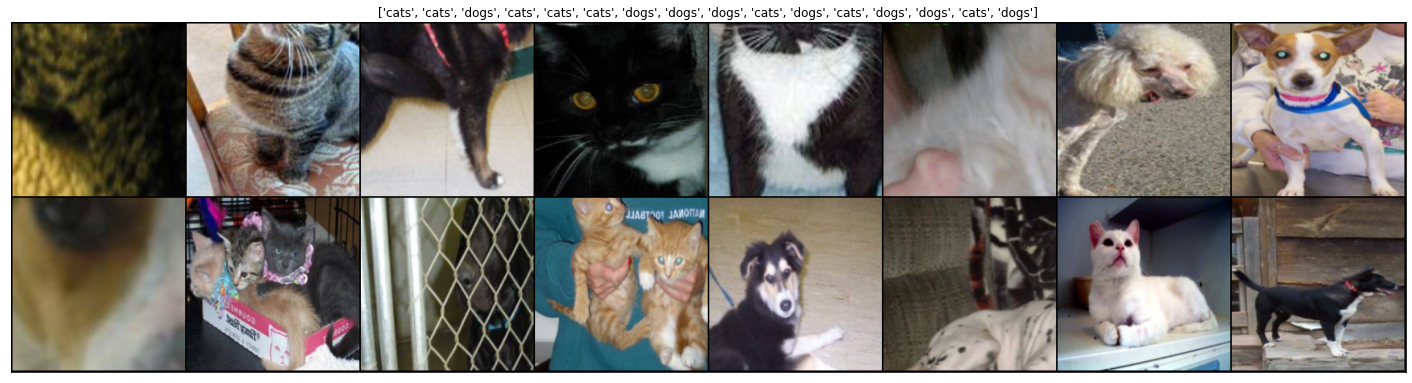

In [17]:
imshow(out,title=[class_name[x] for x in label_plot])

In [18]:
model = nn.Sequential(
nn.Conv2d(3,16,kernel_size=3,padding=0,stride=2),
nn.BatchNorm2d(16),
nn.ReLU(),
nn.MaxPool2d(2),
#nn.Dropout(0.2),
nn.Conv2d(16,32,kernel_size=3,padding=0,stride=2),
nn.BatchNorm2d(32),
nn.ReLU(),
nn.MaxPool2d(2),
#nn.Dropout(0.2),
nn.Conv2d(32,64,kernel_size=3,padding=0,stride=2),
nn.BatchNorm2d(64),
nn.ReLU(),
nn.MaxPool2d(2),
#nn.Dropout(0.2),
nn.Flatten(),
nn.Linear(3*3*64,10),    
nn.Dropout(0.5),
nn.Linear(10,2))

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [20]:
model = model.to(device)

In [21]:
#from torch.nn.modules.loss import BCEWithLogitsLoss
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)
model.to(device)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2))
  (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
  (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Flatten(start_dim=1, end_dim=-1)
  (13): Linear(in_features=576, out_features=10, bias=True)
  (14): Dropout(p=0.5, inplace=False)
  (15): Linear(in_features=10, out_features=2, bias=True)
)

In [25]:
#Train the network
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        #labels = labels.unsqueeze(1).float()
        labels = labels.to(device)
        #print(inputs)

        # zero the parameter gradients
        

        # forward + backward + optimize
        outputs = model(inputs)
        #print(outputs)
        #print(labels)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if (epoch+1) % 1 == 0:    # 
            print(f'epoch:{epoch+1},loss={running_loss}')
            running_loss = 0.0

print('Finished Training')

epoch:1,loss=0.6746351718902588
epoch:1,loss=0.7416734099388123
epoch:1,loss=0.6883392333984375
epoch:1,loss=0.69141685962677
epoch:1,loss=0.6871394515037537
epoch:1,loss=0.7124283313751221
epoch:1,loss=0.6850634813308716
epoch:1,loss=0.7277471423149109
epoch:1,loss=0.6752280592918396
epoch:1,loss=0.6806531548500061
epoch:1,loss=0.6734042167663574
epoch:1,loss=0.6776906847953796
epoch:1,loss=0.6822931170463562
epoch:1,loss=0.6755790710449219
epoch:1,loss=0.6947800517082214
epoch:1,loss=0.6878125071525574
epoch:1,loss=0.6766619086265564
epoch:1,loss=0.6790720224380493
epoch:1,loss=0.6721705794334412
epoch:1,loss=0.6784836053848267
epoch:2,loss=0.6720941066741943
epoch:2,loss=0.6893092393875122
epoch:2,loss=0.6692956686019897
epoch:2,loss=0.6753433346748352
epoch:2,loss=0.7063919901847839
epoch:2,loss=0.6648426055908203
epoch:2,loss=0.6750317215919495
epoch:2,loss=0.6717910766601562
epoch:2,loss=0.6631896495819092
epoch:2,loss=0.6642370820045471
epoch:2,loss=0.6609857082366943
epoch:2,lo

In [23]:
dog_probs = []
model.eval()
with torch.no_grad():
    for data, fileid in test_loader:
        data = data.to(device)
        preds = model(data)
        preds_list = F.softmax(preds, dim=1)[:, 1].tolist()
        dog_probs += list(zip(list(fileid), preds_list))


In [24]:
preds_list

[0.44776129722595215,
 0.4127005636692047,
 0.4021822512149811,
 0.4399329125881195,
 0.4367522597312927,
 0.43262937664985657,
 0.4394737184047699,
 0.41632580757141113,
 0.4206641912460327,
 0.4378829300403595,
 0.40055111050605774,
 0.45190489292144775,
 0.444289892911911,
 0.4180923402309418,
 0.44700199365615845,
 0.4546547830104828,
 0.4245353043079376,
 0.3938829004764557,
 0.35685932636260986,
 0.39518606662750244,
 0.4124254882335663,
 0.40416502952575684,
 0.4180028736591339,
 0.4673713445663452,
 0.4047122895717621,
 0.4516264796257019,
 0.44700896739959717,
 0.3882242739200592,
 0.4152136743068695,
 0.4542640745639801,
 0.45809051394462585,
 0.43964365124702454,
 0.4239915609359741,
 0.4392201006412506,
 0.43120986223220825,
 0.43082547187805176,
 0.4152076542377472,
 0.4059497117996216,
 0.4309839606285095,
 0.4391579031944275,
 0.417141854763031,
 0.4283509850502014,
 0.4762631952762604,
 0.44082891941070557,
 0.4155013859272003,
 0.40122365951538086,
 0.39584431052207947